In [4]:
import pandas as pd
import numpy as np

In [5]:
df =pd.read_csv(r'D:\Study\AI Advanced\Projects\Telco Customer Churn\Data\df_featured')

In [6]:
df.head()

,gender,SeniorCitizen,tenure,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,IsNewCustomer,IsHighCharge,PhoneLineType,NumInternetServices,FamilyStatus,NewCustomer_HighCharge,IsMonthToMonth,MonthToMonth_HighCharge
0,Female,0,1,DSL,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,0,NoPhone,1,PartnerOnly,0,1,0
1,Male,0,34,DSL,One year,No,Mailed check,56.95,1889.5,No,0,0,SingleLine,2,NoFamily,0,0,0
2,Male,0,2,DSL,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,0,SingleLine,2,NoFamily,0,1,0
3,Male,0,45,DSL,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,0,NoPhone,3,NoFamily,0,0,0
4,Female,0,2,Fiber optic,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,1,SingleLine,0,NoFamily,1,1,1


In [7]:
df.dtypes

gender                      object
SeniorCitizen                int64
tenure                       int64
InternetService             object
Contract                    object
PaperlessBilling            object
PaymentMethod               object
MonthlyCharges             float64
TotalCharges                object
Churn                       object
IsNewCustomer                int64
IsHighCharge                 int64
PhoneLineType               object
NumInternetServices          int64
FamilyStatus                object
NewCustomer_HighCharge       int64
IsMonthToMonth               int64
MonthToMonth_HighCharge      int64
dtype: object

In [8]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

binary_cat_cols = [
    'gender',
    'PaperlessBilling'
]

multi_cat_cols = [
    'InternetService',
    'Contract',
    'PaymentMethod',
    'PhoneLineType',
    'FamilyStatus'
]

num_cols = [
    'SeniorCitizen',
    'tenure',
    'MonthlyCharges',
    'TotalCharges',
    'IsNewCustomer',
    'IsHighCharge',
    'IsMonthToMonth',
    'NumInternetServices',
    'NewCustomer_HighCharge',
    'MonthToMonth_HighCharge'
]

In [10]:
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No': 0})

In [11]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), multi_cat_cols),
        ('num', 'passthrough', num_cols)
    ]
)

In [12]:
X = df.drop(columns=['Churn'])
y = df['Churn'].map({'Yes': 1, 'No': 0})

In [13]:
X_encoded = preprocessor.fit_transform(X)

In [14]:
encoded_cat_cols = preprocessor.named_transformers_['cat'] \
    .get_feature_names_out(multi_cat_cols)

final_columns = list(encoded_cat_cols) + num_cols

X_encoded_df = pd.DataFrame(
    X_encoded,
    columns=final_columns
)

X_encoded_df.head()

,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PhoneLineType_NoPhone,PhoneLineType_SingleLine,FamilyStatus_PartnerOnly,...,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,IsNewCustomer,IsHighCharge,IsMonthToMonth,NumInternetServices,NewCustomer_HighCharge,MonthToMonth_HighCharge
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0,1,29.85,29.85,1,0,1,1,0,0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0,34,56.95,1889.5,0,0,0,2,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0,2,53.85,108.15,1,0,1,2,0,0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,45,42.3,1840.75,0,0,0,3,0,0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0,2,70.7,151.65,1,1,1,0,1,1


XGBoost

In [15]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

In [16]:
X_encoded_df = X_encoded_df.replace(' ', np.nan)

C:\Users\amr samy\AppData\Local\Temp\ipykernel_16324\2379930484.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_encoded_df = X_encoded_df.replace(' ', np.nan)


In [17]:
X_encoded_df = X_encoded_df.apply(pd.to_numeric, errors='coerce')
X_encoded_df = X_encoded_df.fillna(0)

In [18]:
X = X_encoded_df
y = df['Churn'].map({'Yes': 1, 'No': 0})

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [19]:
xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric='auc',
    random_state=42
)

In [20]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

In [21]:
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.51      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.79      1409

ROC AUC: 0.8371102327624067


In [22]:
import sys
print(sys.executable)


c:\Users\amr samy\anaconda3\python.exe


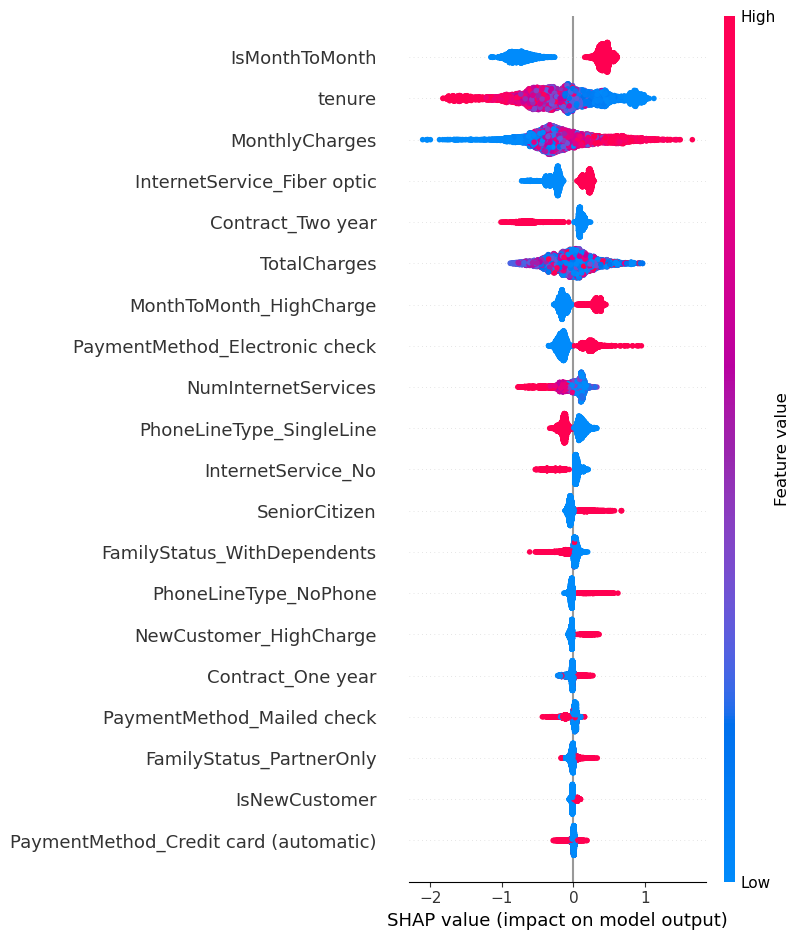

In [23]:
import shap

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train)

The SHAP summary plot shows that contract type, tenure, and pricing are the strongest drivers of churn.

Interaction features like month-to-month with high charges significantly increase churn risk.

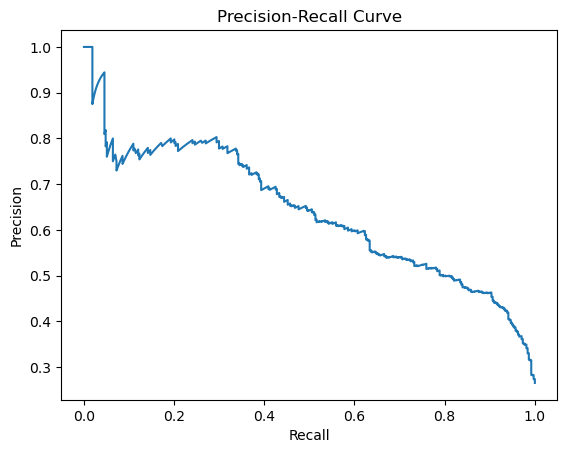

In [25]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
plt.figure()
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

adjuste class weights to better handle class imbalance

In [26]:
neg = (y_train == 0).sum()
pos = (y_train == 1).sum()

scale_pos_weight = neg / pos
scale_pos_weight

2.768561872909699

In [27]:
xgb_weighted = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric='auc',
    scale_pos_weight=scale_pos_weight,
    random_state=42
)

xgb_weighted.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

In [28]:
y_prob_w = xgb_weighted.predict_proba(X_test)[:, 1]
y_pred_w = xgb_weighted.predict(X_test)

from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, y_pred_w))
print("ROC AUC:", roc_auc_score(y_test, y_prob_w))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1035
           1       0.53      0.77      0.63       374

    accuracy                           0.76      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.76      0.77      1409

ROC AUC: 0.8366633082745614


improved churn recall by incorporating class weighting in XGBoost, prioritizing churn detection while maintaining a strong ROC-AUC.

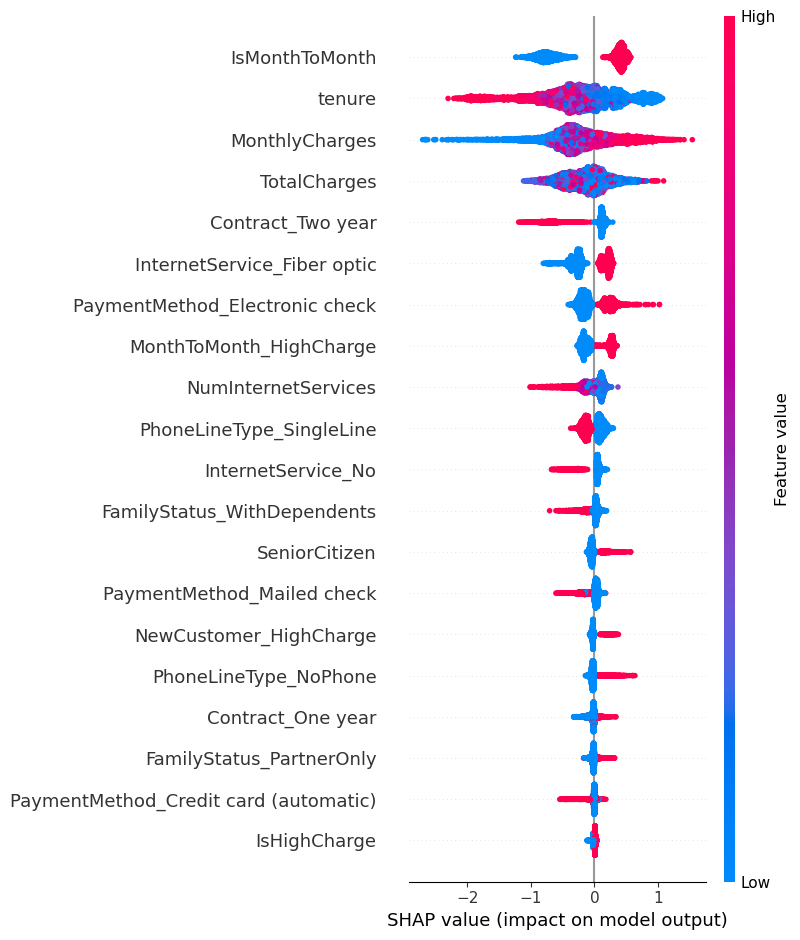

In [29]:
explainer = shap.TreeExplainer(xgb_weighted)  
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train)

In [30]:
import joblib

joblib.dump(
    preprocessor,
    'preprocessor.pkl'
)

joblib.dump(
    xgb_weighted,
    'xgb_weighted_recall_model.pkl'
)

['xgb_weighted_recall_model.pkl']